# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [3]:
import pandas as pd             
import numpy as np               
import matplotlib.pyplot as plt   
import seaborn as sns  
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.decomposition import PCA            
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [4]:
df = pd.read_csv('/Users/vasu/Desktop/Lab 4 - Unsu[ervised learinng/marketing.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [6]:
df.isnull().sum() / len(df) * 100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [7]:
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [8]:
len(df[df.duplicated()])

0

### 5. Drop the columns which you think redundant for the analysis 

In [9]:
df = df.drop(columns=['ID','Dt_Customer'], axis=1)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [10]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [11]:
df['Marital_Status']=df['Marital_Status'].replace(['Married','Together'],'relationship')
df['Marital_Status']=df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [12]:
df['Total_Expenses']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [13]:
df['Num_Total_Purchases']=df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumDealsPurchases']

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [14]:
df['Kids']=df['Kidhome']+df['Teenhome']

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [15]:
df['TotalAcceptedCmp']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

### 11. Drop those columns which we have used above for obtaining new features

In [16]:
df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
         'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases',
         'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'],axis=1,inplace=True)

In [17]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1,1617,25,0,0
1,1954,Graduation,Single,46344.0,38,5,0,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,4,0,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,6,0,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,5,0,0,422,19,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [18]:
df['Age']=2023 - df['Year_Birth']

In [19]:
df.drop('Year_Birth',axis=1, inplace=True)

In [20]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,Graduation,Single,58138.0,58,7,0,1,1617,25,0,0,66
1,Graduation,Single,46344.0,38,5,0,0,27,6,2,0,69
2,Graduation,relationship,71613.0,26,4,0,0,776,21,0,0,58
3,Graduation,relationship,26646.0,26,6,0,0,53,8,1,0,39
4,PhD,relationship,58293.0,94,5,0,0,422,19,1,0,42


In [21]:
dfc=df.copy()

### 13. Encode the categorical variables in the dataset

In [22]:
cate=['Education','Marital_Status']
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [23]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,2,0,58138.0,58,7,0,1,1617,25,0,0,66
1,2,0,46344.0,38,5,0,0,27,6,2,0,69
2,2,1,71613.0,26,4,0,0,776,21,0,0,58
3,2,1,26646.0,26,6,0,0,53,8,1,0,39
4,4,1,58293.0,94,5,0,0,422,19,1,0,42


### 14. Standardize the columns, so that values are in a particular range

In [24]:
df1=df.copy()
scaled_features=StandardScaler().fit_transform(df1.values)
scaled_features_df=pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [25]:
scaled_features_df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,-1.346874,0.235327,0.307039,0.693904,-0.097282,2.388846,1.679417,1.320826,-1.264505,-0.439037,0.985345
1,-0.350141,-1.346874,-0.235826,-0.383664,-0.130463,-0.097282,-0.418612,-0.961275,-1.154596,1.396361,-0.439037,1.235733
2,-0.350141,0.742460,0.773633,-0.798086,-0.542647,-0.097282,-0.418612,0.282673,0.799685,-1.264505,-0.439037,0.317643
3,-0.350141,0.742460,-1.022732,-0.798086,0.281720,-0.097282,-0.418612,-0.918094,-0.894025,0.065928,-0.439037,-1.268149
4,1.428354,0.742460,0.241519,1.550305,-0.130463,-0.097282,-0.418612,-0.305254,0.539114,0.065928,-0.439037,-1.017761


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [26]:
cov_matrix=np.cov(scaled_features.T)
cov_matrix

array([[ 1.00044663e+00, -1.37540339e-02,  1.20027297e-01,
        -1.17336854e-02, -4.02988173e-02, -5.05625191e-02,
         9.08600553e-02,  9.20951775e-02,  9.40543885e-02,
         5.32130438e-02,  3.53512102e-02,  1.71466853e-01],
       [-1.37540339e-02,  1.00044663e+00,  4.63846975e-03,
        -4.50971948e-03,  3.44176238e-03, -5.20465543e-03,
        -1.50142261e-01, -1.77523234e-02,  6.71036864e-03,
         3.91759832e-02,  3.19398267e-05, -4.23840181e-03],
       [ 1.20027297e-01,  4.63846975e-03,  1.00044663e+00,
        -3.94826239e-03, -5.50069657e-01, -2.72352757e-02,
         1.32815769e-01,  6.65003374e-01,  5.63621397e-01,
        -2.90841549e-01,  3.07235330e-01,  1.61013782e-01],
       [-1.17336854e-02, -4.50971948e-03, -3.94826239e-03,
         1.00044663e+00, -2.14542684e-02,  1.32369878e-02,
        -1.98525274e-01,  2.04417334e-02,  5.74294350e-03,
         1.80614498e-02, -1.25753269e-02,  1.98799637e-02],
       [-4.02988173e-02,  3.44176238e-03, -5.5006965

In [27]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eingen values', eig_vals)
print('eingen vectors', eig_vectors)

eingen values [3.29170626 0.15931498 1.38246665 0.33483272 1.23253898 0.48340756
 0.59395377 0.73557515 0.81688414 0.94928835 1.0247576  1.00063338]
eingen vectors [[-0.07983152  0.01685821  0.09281868  0.02729885 -0.61853331  0.1094525
   0.05022603  0.1142458  -0.72192982  0.06953172 -0.16178248 -0.14715039]
 [ 0.02131014 -0.00682272  0.24564279 -0.00259013  0.11963675 -0.18398167
   0.09276926 -0.14117305 -0.11463066  0.31648225 -0.51121813  0.69843317]
 [-0.43904746  0.10938022  0.18640953 -0.73703284 -0.03118886 -0.13947908
  -0.40409357  0.15680279  0.03816898 -0.07939043 -0.01333025  0.03262034]
 [ 0.01286229  0.02815063  0.37107026 -0.02454819  0.17812089 -0.23979286
   0.05102404 -0.09807804 -0.06686353  0.7261519   0.27417381 -0.39032978]
 [ 0.35959058 -0.09233675 -0.25797328 -0.51951884 -0.19969188  0.23269777
   0.43510571  0.31470377  0.2100814   0.30779899 -0.00979539  0.06608776]
 [ 0.02817204 -0.00514926  0.02250702 -0.00230654  0.01188429  0.03269596
  -0.00205615  0.0

In [28]:
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print('Explained variance', var_exp)
print('cummulative variance', cum_var_exp)

Explained variance [27.418639595227518, 11.51541233901037, 10.266572813146576, 8.535834325312749, 8.334888876055379, 7.907204632644081, 6.804328847736531, 6.127056422103573, 4.947405125374239, 4.026597931803708, 2.7890269881523597, 1.3270321034329196]
cummulative variance [ 27.4186396   38.93405193  49.20062475  57.73645907  66.07134795
  73.97855258  80.78288143  86.90993785  91.85734298  95.88394091
  98.6729679  100.        ]


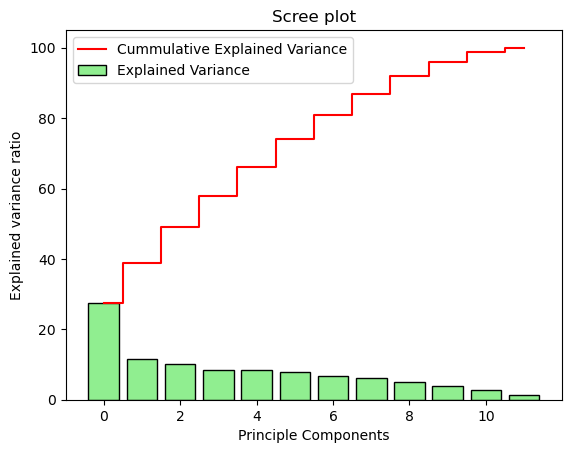

In [30]:
plt.bar(range(12),var_exp,align='center',color='lightgreen', edgecolor='black', label="Explained Variance")
plt.step(range(12), cum_var_exp, where='mid',color='red', label="Cummulative Explained Variance")
plt.xlabel('Principle Components')
plt.ylabel('Explained variance ratio')
plt.title('Scree plot')
plt.legend(loc='best')
plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [32]:
pca = PCA(n_components=8)
pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns=['PC1','PC2', 'PC3','PC4', 'PC5','PC6', 'PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.085284,-1.274957,0.673117,1.051116,-0.919616,-0.051882,-1.029184,-0.153657
1,-1.555525,0.316074,1.028413,0.726495,-0.735384,-1.024646,-0.949663,0.712277
2,1.195174,0.652623,-0.638360,-0.594240,0.710674,-1.031622,-0.078438,0.087346
3,-1.775555,-0.568907,-0.970029,-0.835940,0.602435,-0.418083,0.547605,-0.138138
4,-0.031709,1.113664,-0.082254,-0.439182,-0.433814,1.287173,1.510799,-0.893553


In [35]:
cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,random_state=100)
    clusters.fit (pca_df)
    cluster_errors.append (clusters.inertia_)

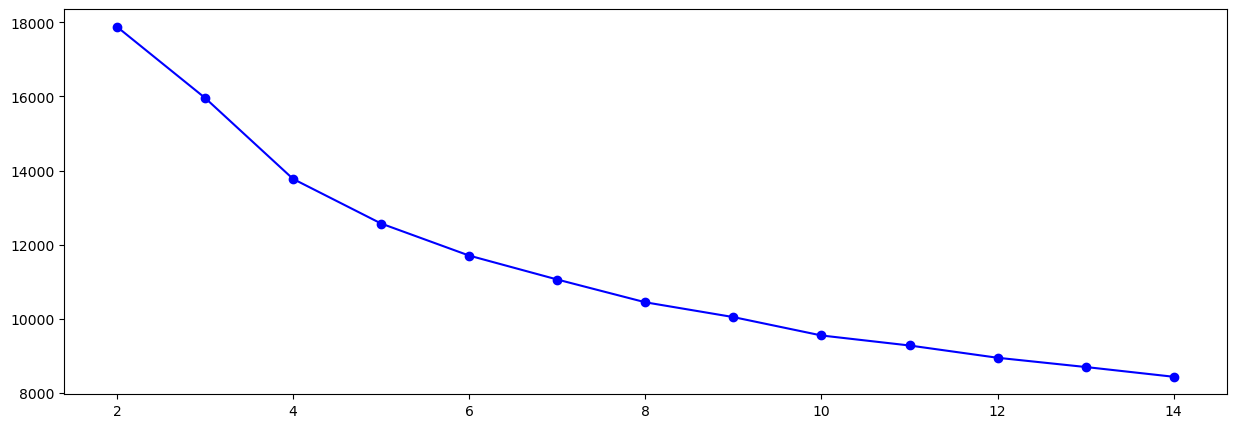

In [37]:
cluster_df=pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors': cluster_errors})

plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

In [38]:
kmeans = KMeans (n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [40]:
label = pd.DataFrame(kmeans.labels_, columns= ['Label'])

In [41]:
kmeans_df= pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,2.085284,-1.274957,0.673117,1.051116,-0.919616,-0.051882,-1.029184,-0.153657,2
1,-1.555525,0.316074,1.028413,0.726495,-0.735384,-1.024646,-0.949663,0.712277,1
2,1.195174,0.652623,-0.638360,-0.594240,0.710674,-1.031622,-0.078438,0.087346,0
3,-1.775555,-0.568907,-0.970029,-0.835940,0.602435,-0.418083,0.547605,-0.138138,1
4,-0.031709,1.113664,-0.082254,-0.439182,-0.433814,1.287173,1.510799,-0.893553,0


### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

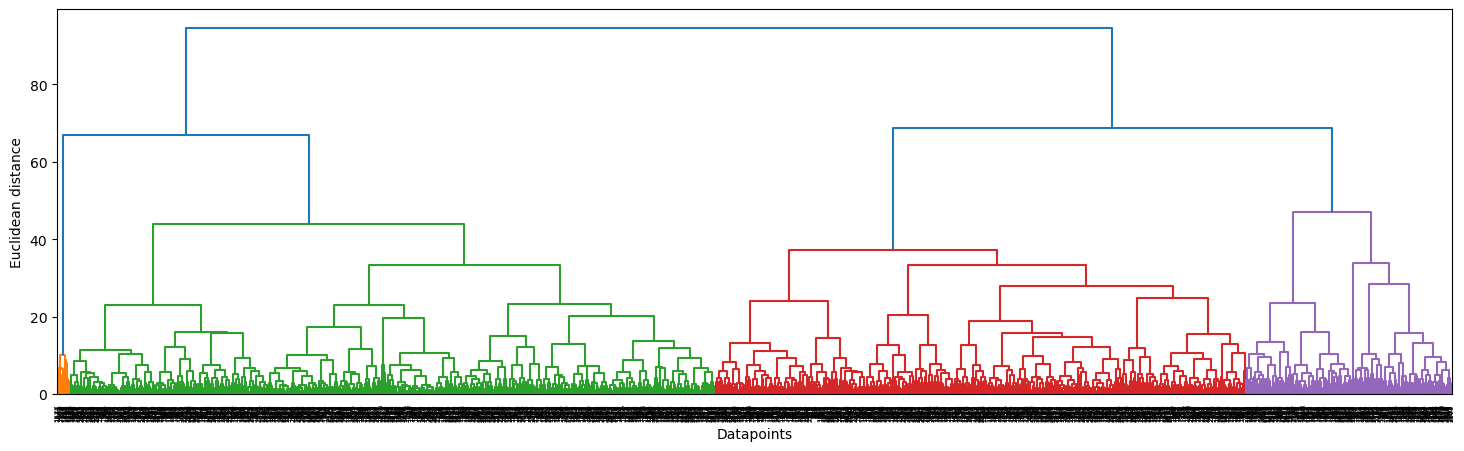

In [44]:
plt.figure(figsize=[18,5])
merg = linkage (scaled_features, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel ('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [47]:
from sklearn.metrics import silhouette_score

In [48]:
for i in range (2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

2 0.16904202826259473
3 0.1753174684607551
4 0.18595520384571393
5 0.19694610976497967
6 0.14471656409734507
7 0.13384961915147686
8 0.13506835154933547
9 0.11577718242433038
10 0.11585235212381771
11 0.1179100650591386
12 0.11649183140012234
13 0.11666449576170516
14 0.11869735156413867


In [49]:
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)

In [50]:
df_label1= pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head()

,Labels
0,1
1,0
2,2
3,0
4,0


In [51]:
df_hier = dfc.join(df_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Labels
0,Graduation,Single,58138.0,58,7,0,1,1617,25,0,0,66,1
1,Graduation,Single,46344.0,38,5,0,0,27,6,2,0,69,0
2,Graduation,relationship,71613.0,26,4,0,0,776,21,0,0,58,2
3,Graduation,relationship,26646.0,26,6,0,0,53,8,1,0,39,0
4,PhD,relationship,58293.0,94,5,0,0,422,19,1,0,42,0


### Visualization and Interpretation of results

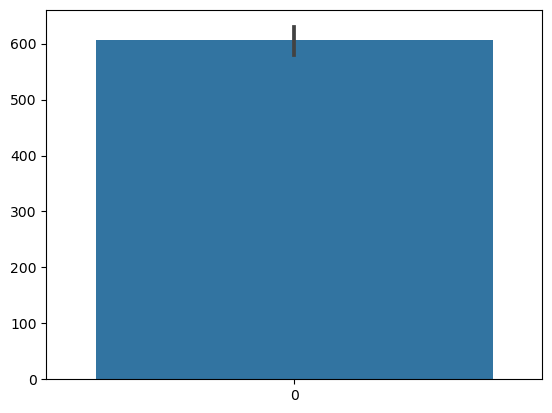

In [54]:
sns.barplot(df_hier['Total_Expenses'])
plt.show()

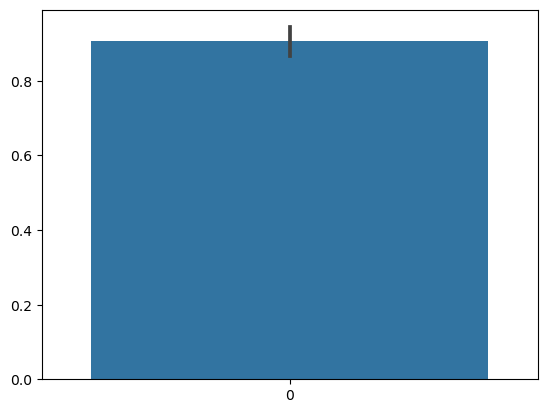

In [55]:
sns.barplot(df_hier['Labels'])
plt.show()

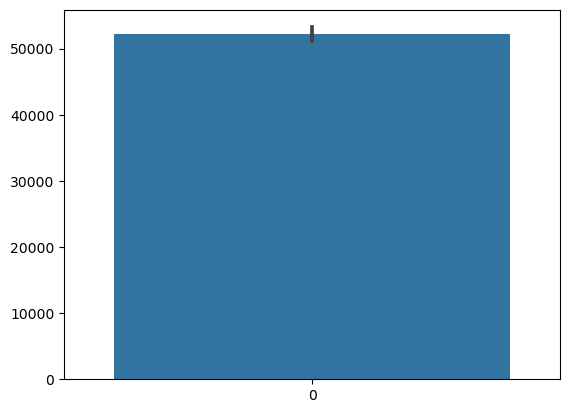

In [58]:
sns.barplot(df_hier['Income'])
plt.show()

-----
## Happy Learning
-----